# Packages

In [1]:
#Standard python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 

# Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
scaler = StandardScaler()
from sklearn import metrics

# # Models & Utilities
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Warnings
import warnings
warnings.filterwarnings(action='ignore') 

# NLP Libraries
import nltk
import collections
nltk.download('punkt')
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
np.random.seed(0)
import re
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
from nltk import ngrams
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Added
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('data/IMDB Dataset.csv')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Taking a look at our columns
print(df.info())

# Checking for NA data
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       0
sentiment    0
dtype: int64


In [4]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


### remove duplicates?

### change pos to 1 and neg to 0

## Add features

In [6]:
run = False

if run == True:

    ## Indirect features
    eng_stopwords = set(stopwords.words("english"))

    df['count_sent']=df["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)
    #Word count in each comment:
    df['count_word']=df["review"].apply(lambda x: len(str(x).split()))
    #Unique word count
    df['count_unique_word']=df["review"].apply(lambda x: len(set(str(x).split())))
    #Letter count
    df['count_letters']=df["review"].apply(lambda x: len(str(x)))
    #punctuation count
    df["count_punctuations"] =df["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    #upper case words count
    df["count_words_upper"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
    #title case words count
    df["count_words_title"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    #Number of stopwords
    df["count_stopwords"] = df["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
    #Average length of the words
    df["mean_word_len"] = df["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    #Word count percent in each comment:
    df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
    #Punct percent in each comment:
    df['punct_percent']=df['count_punctuations']*100/df['count_word']
    #derived features
    #Word count percent in each comment:
    df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
    #derived features
    #Punct percent in each comment:
    df['punct_percent']=df['count_punctuations']*100/df['count_word']
    
    df.to_json('data/df_json_store.json')
    
else:
     df = pd.read_json('data/df_json_store.json')
        
df.head(2)

,review,sentiment,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,One of the other reviewers has mentioned that ...,positive,1,307,208,1761,78,8,36,133,4.739414,67.752443,25.407166
1,A wonderful little production. <br /><br />The...,positive,1,162,114,998,44,2,12,66,5.166667,70.370370,27.160494


### 25 most common words in positive and negative reviews

In [7]:

# ax = neg_freq_df.set_index('Word').sort_values('Frequency').plot(kind='barh')
# ax.set(title="25 Most Common Words in Negative Tweets")

### Word clouds pos / neg

### visualize TSNE

### mean word length postive or negative?.  bucket and histogram?

### Same with word unique percentage

Sentiment across word count

Word count histogram



In [8]:
df

,review,sentiment,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,One of the other reviewers has mentioned that ...,positive,1,307,208,1761,78,8,36,133,4.739414,67.752443,25.407166
1,A wonderful little production. <br /><br />The...,positive,1,162,114,998,44,2,12,66,5.166667,70.370370,27.160494
2,I thought this was a wonderful way to spend ti...,positive,1,166,121,926,40,3,20,76,4.584337,72.891566,24.096386
3,Basically there's a family where a little boy ...,negative,1,138,96,748,42,3,13,62,4.427536,69.565217,30.434783
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,230,152,1317,56,1,31,96,4.730435,66.086957,24.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1,194,127,1008,46,3,7,102,4.201031,65.463918,23.711340
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,1,112,85,642,26,3,15,51,4.741071,75.892857,23.214286
49997,I am a Catholic taught in parochial elementary...,negative,1,230,148,1280,45,5,21,111,4.569565,64.347826,19.565217
49998,I'm going to have to disagree with the previou...,negative,1,212,154,1234,28,0,20,96,4.825472,72.641509,13.207547


# Text Preprocessing

## Remove

In [9]:
first_review = df['review'][0][0:500]
first_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ"

In [10]:
## From tjhe lessons
from nltk import regexp_tokenize
pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
regexp_tokenize(first_review,pattern)

['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 'Oz',
 'episode',
 "you'll",
 'be',
 'hooked',
 'They',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me',
 'br',
 'br',
 'The',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 'Trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'This',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'Its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word',
 'br',
 'br',
 'It',
 'is',
 'called',
 'OZ']

In [11]:
stop_words_list = stopwords.words('english')

stop_words_list.append('br')

In [12]:
tokens = regexp_tokenize(first_review, pattern)

tokens

bad_tags = ['br']

cleaned_tokens = []

for token in tokens:
    if token not in bad_tags:
        cleaned_tokens.append(token)
        
cleaned_tokens[0:5]
    

['One', 'of', 'the', 'other', 'reviewers']

In [13]:
stop_words_list = stopwords.words('english')

remove_words = ["i've", "i'm", 'br']

stop_words_list += remove_words

stop_words_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Tokenizer

In [14]:
# def my_tokenizer(first_review, stop_words=False, 
#                  stop_words_add=[],
#                  remove_words=remove_words, show_full=False):
                
#         pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
# #         pattern = r"[a-zA-Z.0-9+#-/]*[^.\s]"

#         tokens = regexp_tokenize(first_review.lower(), pattern)

#         stop_words_list = []
        
#         if stop_words == True:            
#             stop_words_list = stopwords.words('english')
#             stop_words_list += stop_words_add
            
#         stop_words_list += remove_words
#         [x.lower() for x in stop_words_list]
#         cleaned_tokens = []

#         for token in tokens:
#             if token not in stop_words_list:
#                 cleaned_tokens.append(token)
        
#         if show_full == False:
#             return cleaned_tokens
#         else:
#             return " ".join(cleaned_tokens)#, stop_words_list
    
# my_tokenizer("i'm going to the store", stop_words=True, 
#              stop_words_add=[], show_full=True)


def my_tokenizer(first_review, stop_words=False, 
                 stop_words_add=[],
                 remove_words=remove_words, show_full=False):
                
        pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
#         pattern = r"[a-zA-Z.0-9+#-/]*[^.\s]"

        tokens = regexp_tokenize(first_review, pattern)

        stop_words_list = []
        
        if stop_words == True:            
            stop_words_list = stopwords.words('english')
            stop_words_list += stop_words_add
            
        stop_words_list += remove_words
        [x for x in stop_words_list]
        cleaned_tokens = []

        for token in tokens:
            if token not in stop_words_list:
                cleaned_tokens.append(token)
        
        if show_full == False:
            return cleaned_tokens
        else:
            return " ".join(cleaned_tokens)#, stop_words_list
    
my_tokenizer("i'm going to the store", stop_words=True, 
             stop_words_add=[], show_full=True)


'going store'

In [15]:
df['reviews_t'] = df['review'].apply(lambda text: my_tokenizer(text, stop_words=True))

df['reviews_t']


0        [One, reviewers, mentioned, watching, Oz, epis...
1        [A, wonderful, little, production, The, filmin...
2        [I, thought, wonderful, way, spend, time, hot,...
3        [Basically, there's, family, little, boy, Jake...
4        [Petter, Mattei's, Love, Time, Money, visually...
                               ...                        
49995    [I, thought, movie, right, good, job, It, crea...
49996    [Bad, plot, bad, dialogue, bad, acting, idioti...
49997    [I, Catholic, taught, parochial, elementary, s...
49998    [I'm, going, disagree, previous, comment, side...
49999    [No, one, expects, Star, Trek, movies, high, a...
Name: reviews_t, Length: 50000, dtype: object

# EDA TO DO:

Break out everything by positive and negative FIRST

visualize pos neg bigrams trigrams etc

Are pos negative review shorter or longer

Are longer words more typical of positive or negative reviews

Code to use from: 

https://medium.com/plotly/nlp-visualisations-for-clear-immediate-insights-into-text-data-and-outputs-9ebfab168d5b

fig = px.bar(long_bigram_df_tidy, title='Comparision: ' + ngrams_list[0] + ' | ' + ngrams_list[1], x='ngram', y='value'
             , color='variable', template='plotly_white', color_discrete_sequence=px.colors.qualitative.Bold
             , labels={'variable': 'Company:', 'ngram': 'N-Gram'})
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=0.1, y=1.1))
fig.update_yaxes(title='', showticklabels=False)
fig.show()

## Bag of Words

In [ ]:
# Tokens

tokens = []

for row in df['reviews_t']:
    tokens.extend(row)
    
print(f'Number of tokens: {len(tokens)}')


In [ ]:
# Frequency distribution

review_freqdist = FreqDist(tokens)
most_common = review_freqdist.most_common(50)

In [ ]:
# Number of unique tokens

len(review_freqdist)

In [ ]:
print(most_common)

In [ ]:
total = review_freqdist.N()
for word in review_freqdist:
    review_freqdist[word] /= float(total)

review_freqdist

In [ ]:
total_word_count = sum(review_freqdist.values())
review_top_10 = review_freqdist.most_common(10)
print('Word\t\t\tNormalized Frequency')
for word in review_top_10:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

## Word Clouds

In [ ]:
# !pip install wordcloud

from wordcloud import WordCloud

### To Do:

Break out by positive and negative

### Positive

In [ ]:
# Positive tokens

df_positive = df['reviews_t'].loc[df['sentiment'] == 'positive']

tokens_positive = []

for row in df_positive:
    tokens_positive.extend(row)
    
print(f'Number of tokens: {len(tokens_positive)}')

In [ ]:
#Positive reviews
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 200, 
               width = 800, height = 600, 
               colormap='Greens',
               stopwords = STOPWORDS).generate(" ".join(tokens_positive))

plt.imshow(wc)


In [ ]:
plt.show(wc)

### Positive

In [ ]:
# Negative tokens

df_negative = df['reviews_t'].loc[df['sentiment'] == 'negative']

tokens_negative = []

for row in df_negative:
    tokens_negative.extend(row)
    
print(f'Number of tokens: {len(tokens_negative)}')

In [ ]:
#Positive reviews
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (12,12))
wc = WordCloud(max_words = 200, 
               width = 800, height = 600, 
               colormap='Reds',
               stopwords = STOPWORDS).generate(" ".join(tokens_negative))

plt.imshow(wc)


In [ ]:
tokens_negative

## Ngrams

In [ ]:
n_gram = (pd.Series(nltk.ngrams(tokens, 2)).value_counts())[:7]

In [ ]:
def plot_ngram(tokens, i):
    n_gram = (pd.Series(nltk.ngrams(tokens, i)).value_counts())[:10]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head(10))
    plt.figure(figsize = (10,5))
    return sns.barplot(x='count',y='word', data=n_gram_df)

plot_ngram(tokens, 1)

In [ ]:
plot_ngram(tokens, 2)

In [ ]:
plot_ngram(tokens, 3)

In [ ]:
plot_ngram(tokens_positive, 4)

In [ ]:
tokens


# Modeling

In [ ]:
# df['reviews_p'] = df['reviews_t']

# X_train, X_test, y_train, y_test = train_test_split(df['reviews_p'], df['sentiment'], test_size=0.3,random_state=0)

## TF - IDF

In [16]:
## set up text preprocessing pipeline

tfidf = TfidfVectorizer(strip_accents='unicode', 
                        tokenizer=my_tokenizer, 
                        stop_words=stop_words_list
                            )

X = df['review']
y = df['sentiment']

# Do train test split here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# Fit both x train and test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)




In [17]:
# Logistic Regression with TF-IDF Vectoriser
tfidf_log = LogisticRegression(penalty='l2',C=10)
tfidf_log.fit(X_train_tfidf, y_train)

LogisticRegression(C=10)

In [18]:
def evaluate_model(model, X_train=X_train, X_test=X_test, y_train=y_train, 
                   y_test=y_test, cmap='Greens', normalize='true',
                   classes=None,figsize=(10,4)):
    
    # Print model accuracy
    print(f'Training Accuracy: {model.score(X_train,y_train):.2%}')
    print(f'Test Accuracy: {model.score(X_test,y_test):.2%}')
    print('')
    
    # Print classification report
    y_test_predict = model.predict(X_test)
    print(metrics.classification_report(y_test, y_test_predict,
                                        target_names=classes))
    
    # Plot confusion matrix
    fig,ax = plt.subplots(ncols=2,figsize=figsize)
    metrics.plot_confusion_matrix(model, X_test,y_test,cmap=cmap, 
                                  normalize=normalize,display_labels=classes,
                                  ax=ax[0])
    
    #Plot ROC curves
    with sns.axes_style("darkgrid"):
        curve = metrics.plot_roc_curve(model,X_train,y_train,ax=ax[1])
        curve2 = metrics.plot_roc_curve(model,X_test,y_test,ax=ax[1])
        curve.ax_.grid()
        curve.ax_.plot([0,1],[0,1],ls=':')
        fig.tight_layout()
        plt.show()

Training Accuracy: 98.79%
Test Accuracy: 89.47%

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7540
    positive       0.89      0.90      0.90      7460

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



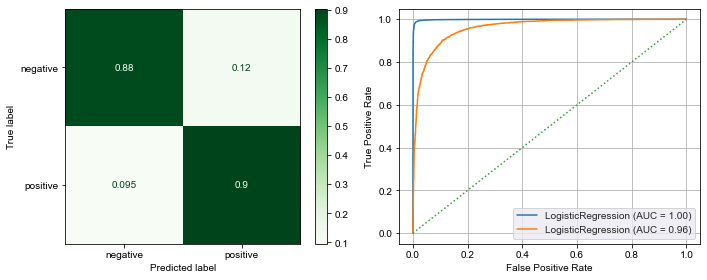

In [19]:
evaluate_model(tfidf_log, X_train=X_train_tfidf, X_test=X_test_tfidf)

In [73]:
feature_names = tfidf.get_feature_names()
feature_names

df_coef = pd.DataFrame()

df_coef['features'] = feature_names
df_coef['coefficients'] = tfidf_log.coef_.flatten()

df_coef.sort_values(by='coefficients', ascending=False)

,features,coefficients
34791,great,11.178709
27625,excellent,10.834942
61605,perfect,9.804772
92027,wonderful,8.779949
7584,best,8.468396
...,...,...
9471,boring,-10.769391
5528,bad,-11.986093
5210,awful,-13.750660
90354,waste,-15.427182


## Count Vectorizer

In [ ]:
## set up text preprocessing pipeline

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(strip_accents='unicode',
                              tokenizer=my_tokenizer,

                             stop_words=stop_words_list
                            )

# X = df['review']
# y = df['sentiment']

# X

# # Do train test split here
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# Fit both x train and test
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)




In [ ]:
# X_train_cv

In [ ]:
# Logistic Regression with Count Vectoriser
cv_log = LogisticRegression(penalty='l2',C=10)
cv_log.fit(X_train_cv, y_train)

In [ ]:
evaluate_model(cv_log, X_train=X_train_cv, X_test=X_test_cv)

## XGBoost

In [ ]:
model_xgb_tf = XGBClassifier() #Default XGBoost Model with TF_IDF
model_xgb_tf.fit(X_train_tfidf, y_train)

evaluate_model(model_xgb_tf, X_train=X_train_tfidf, X_test=X_test_tfidf)

In [ ]:
model_xgb_cv = XGBClassifier() #Default XGBoost Model with TF_IDF
model_xgb_cv.fit(X_train_tfidf, y_train)

evaluate_model(model_xgb_cv, X_train=X_train_cv, X_test=X_test_cv)

In [ ]:
# Create compare model function

def model_compare(base_model, grid_search_model):
    
    # Calculate accuracies
    base_score = base_model.score(X_test, y_test)
    grid_score = grid_search_model.score(X_test, y_test)
    
    #Print accuracies
    print("--- Base Model ---")
    model_accuracy(base_model)
    print('')
    print("--- Grid Search Model ---")
    model_accuracy(grid_search_model)
    print('')
    
    # If/else function to display best model and score improvement
    if base_score < grid_score:    
        print(f'Our grid search model outperformed our base model by {(grid_score - base_score):.2%}')
    else:
        print(f'Our base model outperformed our grid search model by {(base_score - grid_score):.2%}')
    
# model_compare(model_log, log_grid_search.best_estimator_)

In [ ]:
# If run = True, code will perform full grid search
# If run = False, code will use previously calculated best parameters
run = False

# Instantiate new model for hyperparameter tuning
model_xgb_hp = XGBClassifier(random_state=8)

# Define grid search parameters
if run == True:
    param_grid = {
        'learning_rate': [0.0001, 0.001, 0.01, 0.1],
        'max_depth': [3, 5, 7, 9],
        'min_child_weight': [1, 2],
        'subsample': [0.5, 0.7, 1],
        'n_estimators': [10, 100, 1000]}
else:
    param_grid = {
        'learning_rate': [0.01],
        'max_depth': [5],
        'min_child_weight': [2],
        'subsample': [0.5],
        'n_estimators': [100]}

# Create grid search and train
xgb_grid_search = GridSearchCV(model_xgb_hp, param_grid, scoring='accuracy', 
                               cv=5, n_jobs=-1, verbose=100)
xgb_grid_search.fit(X_train_tfidf, y_train)

# # Print metrics
# model_compare(model_xgb_tf, xgb_grid_search.best_estimator_)
# print("")
# print(f"Cross Validated Score: {xgb_grid_search.best_score_ :.2%}")
# print("")
# print(f"Optimal Parameters: {xgb_grid_search.best_params_}")

In [ ]:
print("")
print(f"Cross Validated Score: {xgb_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {xgb_grid_search.best_params_}")

In [ ]:
model_compare(model_xgb_tf, xgb_grid_search.best_estimator_)
print("")
print(f"Cross Validated Score: {xgb_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {xgb_grid_search.best_params_}")

In [ ]:
X_train_tfidf

## Neural Networks

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
import string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
df['sentiment'] = df['sentiment'].replace('positive',1)
df['sentiment'] = df['sentiment'].replace('negative',0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['reviews_t'], df['sentiment'],test_size=0.2, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.1, random_state=0)

In [ ]:
[x.shape for x in [X_train,X_valid,X_test]]

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['reviews_t'])

X_train1 = tokenizer.texts_to_sequences(X_train)
X_valid1 = tokenizer.texts_to_sequences(X_valid)
X_test1 = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[2])
print(X_train1[2])

In [ ]:
seq_lens = [len(s) for s in X_train1]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

In [ ]:
maxlen = 150

X_train1 = pad_sequences(X_train1, padding='post', maxlen=maxlen)
X_valid1 = pad_sequences(X_valid1, padding='post', maxlen=maxlen)
X_test1 = pad_sequences(X_test1, padding='post', maxlen=maxlen)

print(X_train1[2, :])

In [ ]:
vocab_size

In [ ]:
embedding_dim = 50
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

In [ ]:
y_train

In [ ]:
history = model.fit(X_train1, y_train,epochs=10,verbose=True,validation_data=(X_valid1, y_valid),batch_size=1000,callbacks=[callback])

In [ ]:
accuracy_score(y_test, model.predict_classes(X_test1))

In [ ]:
plot_history(history)

## CNN Model

In [ ]:
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

In [ ]:
model.fit(X_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(X_valid1,y_valid),callbacks=[callback])

In [ ]:
accuracy_score(y_test, model.predict_classes(X_test1))

In [ ]:
plot_history(history)

# Word analysis

## Frequency Distribution

## Normalized word frequency

## Bigrams

## Mutual information scores



### TF-IDF vectorization
#### Visualize Vector


### bag of words

## Models

# Scratch

## Random Forest

In [ ]:
# Initiate a random forest model
model_rf = RandomForestClassifier(random_state=8)
model_rf.fit(X_train_tfidf, y_train)

# model_accuracy(model_rf)

In [ ]:
evaluate_model(model_rf, X_train=X_train_tfidf, X_test=X_test_tfidf)

In [ ]:
params = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [5, 30]
}

clf_rf = RandomForestClassifier()
gs_rf = GridSearchCV(clf_rf, param_grid=params, scoring='f1_macro', cv=3, verbose=3)
gs_rf.fit(X_train_tfidf, y_train)

In [ ]:
gs_rf.best_score_

In [ ]:
gs_rf.best_params_

## LSTM

In [ ]:
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

In [ ]:
model.fit(X_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(X_valid1,y_valid),callbacks=[callback])

In [ ]:
accuracy_score(y_test, model.predict_classes(X_test1))

In [ ]:
plot_history(history)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
sentence_1="This is a good job.I will not miss it for anything"
sentence_2="This is not good at all"
 
 
 
#without smooth IDF
print("Without Smoothing:")
#define tf-idf
tf_idf_vec = TfidfVectorizer(use_idf=True, 
                        smooth_idf=False,  
                        ngram_range=(1,1),stop_words='english') # to use only  bigrams ngram_range=(2,2)
#transform
tf_idf_data = tf_idf_vec.fit_transform([sentence_1,sentence_2])
 
#create dataframe
tf_idf_dataframe=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names())
print(tf_idf_dataframe)
print("\n")
 
#with smooth
tf_idf_vec_smooth = TfidfVectorizer(use_idf=True,  
                        smooth_idf=True,  
                        ngram_range=(1,1),stop_words='english')
 
 
tf_idf_data_smooth = tf_idf_vec_smooth.fit_transform([sentence_1,sentence_2])
 
print("With Smoothing:")
tf_idf_dataframe_smooth=pd.DataFrame(tf_idf_data_smooth.toarray(),columns=tf_idf_vec_smooth.get_feature_names())
print(tf_idf_dataframe_smooth)


negative


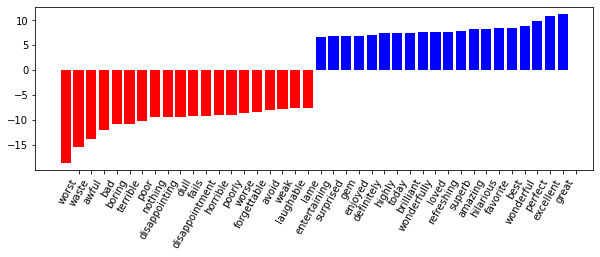

negative


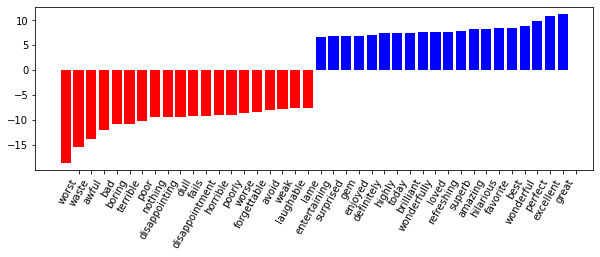

In [65]:
def plot_coefficients(classifier, feature_names, top_features=20):

    # Access the coefficients from classifier
    coef = classifier.coef_

    # Access the classes
    classes = classifier.classes_

    # Iterate the loop for number of classes
    for i in range(len(classes)):

        i = 0
        print(classes[i])

        # Access the row containing the coefficients for this class
        class_coef = coef[i]


        # Below this, I have just replaced 'i' in your code with 'class_coef'
        # Pass this to get top and bottom features
        top_positive_coefficients = np.argsort(class_coef)[-top_features:]
        top_negative_coefficients = np.argsort(class_coef)[:top_features]

        # Concatenate the above two 
        top_coefficients = np.hstack([top_negative_coefficients, 
                                      top_positive_coefficients])
        # create plot
        plt.figure(figsize=(10, 3))

        colors = ["red" if c < 0 else "blue" for c in class_coef[top_coefficients]]
        plt.bar(np.arange(2 * top_features), class_coef[top_coefficients], color=colors)
        feature_names = np.array(feature_names)

        # Here I corrected the start to 0 (Your code has 1, which shifted the labels)
        plt.xticks(np.arange(1, 1 + 2 * top_features), 
                   feature_names[top_coefficients], rotation=60, ha="right")
        plt.show()
        
plot_coefficients(tfidf_log, tfidf.get_feature_names(), top_features=20)